Import Essential Libraries

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

Import "merged_lego_dataset.csv"

In [3]:
legoData = pd.read_csv("merged_lego_dataset.csv")
legoData.head()

,set_id,set_name,release_year,theme_id,num_parts,num_figs,retail_price,num_unique_figs,set_rating,retire_month,...,Packaging,Num_Instructions,Availability,Pieces,Minifigures,Owned,Rating,USD_MSRP,Total_Quantity,Current_Price
0,60244-1,Police Helicopter Transport,2020,61,317,4,39.99,3,4.6,Oct-21,...,Box,6,Retail,317.0,4.0,925.0,0.0,49.99,4.0,19.8000
1,60248-1,Fire Helicopter Response,2020,58,93,3,17.99,0,4.4,Nov-21,...,Box,2,Retail,93.0,3.0,1137.0,2.3,29.99,1.0,9.9900
2,60252-1,Construction Bulldozer,2020,56,126,2,17.99,0,4.5,Nov-21,...,Box,4,Retail,126.0,2.0,2606.0,3.8,19.99,9.0,18.5000
3,60254-1,Race Boat Transporter,2020,52,239,2,24.99,0,4.6,Nov-21,...,Box,4,Retail,238.0,2.0,2245.0,4.0,29.99,2.0,28.0000
4,60258-1,Tuning Workshop,2020,52,897,7,89.99,6,4.6,Nov-21,...,Box,12,Retail,897.0,7.0,3111.0,4.1,99.99,11.0,73.4902


Extracting numerical predictors from dataset

In [4]:
numericalData = legoData[['num_parts','num_figs','retail_price','num_unique_figs','retire_price','pop_price','Num_Instructions','Owned','USD_MSRP','Total_Quantity']]
numericalData

,num_parts,num_figs,retail_price,num_unique_figs,retire_price,pop_price,Num_Instructions,Owned,USD_MSRP,Total_Quantity
0,317,4,39.99,3,37.600,37.290,6,925.0,49.99,4.0
1,93,3,17.99,0,22.740,22.490,2,1137.0,29.99,1.0
2,126,2,17.99,0,21.000,19.740,4,2606.0,19.99,9.0
3,239,2,24.99,0,32.190,35.270,4,2245.0,29.99,2.0
4,897,7,89.99,6,86.170,95.370,12,3111.0,99.99,11.0
...,...,...,...,...,...,...,...,...,...,...
717,310,4,34.99,1,34.445,45.055,2,3640.0,29.99,13.0
718,363,2,34.99,1,33.685,31.205,2,6536.0,29.99,9.0
719,282,10,24.99,4,35.530,34.145,1,10981.0,39.99,18.0
720,558,4,49.99,3,52.320,47.695,2,5155.0,49.99,6.0


Function for summary statistics

In [31]:
def summary_stats(var):
    var_df = pd.DataFrame(legoData[var])
    print("Count: ", var_df.count())
    print("Mean: ", var_df.mean())
    print("Median: ", var_df.median())
    print("Quantile: ", var_df.quantile([0.25,0.50,0.75]))
    print("STD: ", var_df.std())
    print("Min: ", var_df.min())
    print("Max: ", var_df.max())
    print("\n")

Summary Statistics for Numerical Variables

In [32]:
for var in numericalData:
    summary_stats(var)

Count:  num_parts    722
dtype: int64
Mean:  num_parts    517.495845
dtype: float64
Median:  num_parts    333.0
dtype: float64
Quantile:        num_parts
0.25     191.00
0.50     333.00
0.75     602.75
STD:  num_parts    615.932545
dtype: float64
Min:  num_parts    52
dtype: int64
Max:  num_parts    5923
dtype: int64


Count:  num_figs    722
dtype: int64
Mean:  num_figs    2.66759
dtype: float64
Median:  num_figs    2.0
dtype: float64
Quantile:        num_figs
0.25       0.0
0.50       2.0
0.75       4.0
STD:  num_figs    2.84608
dtype: float64
Min:  num_figs    0
dtype: int64
Max:  num_figs    21
dtype: int64


Count:  retail_price    722
dtype: int64
Mean:  retail_price    46.499363
dtype: float64
Median:  retail_price    29.99
dtype: float64
Quantile:        retail_price
0.25         19.99
0.50         29.99
0.75         54.99
STD:  retail_price    44.507298
dtype: float64
Min:  retail_price    10.99
dtype: float64
Max:  retail_price    399.99
dtype: float64


Count:  num_unique_fi

Summary Statistics for Current Price

In [33]:
summary_stats('Current_Price')

Count:  Current_Price    652
dtype: int64
Mean:  Current_Price    85.332402
dtype: float64
Median:  Current_Price    50.0
dtype: float64
Quantile:        Current_Price
0.25      29.876325
0.50      50.000000
0.75      99.242500
STD:  Current_Price    102.90252
dtype: float64
Min:  Current_Price    6.5
dtype: float64
Max:  Current_Price    895.0
dtype: float64




Function for summary statistics visualisation

In [41]:
def summary_stats_vis(var):
    var_df = pd.DataFrame(legoData[var])
    f = plt.figure(figsize = (24,4))
    sb.boxplot(data = var_df, orient = "h")
    f = plt.figure(figsize = (16,8))
    sb.histplot(data = var_df, kde = True)

Visualisation of summary statistics for numerical data

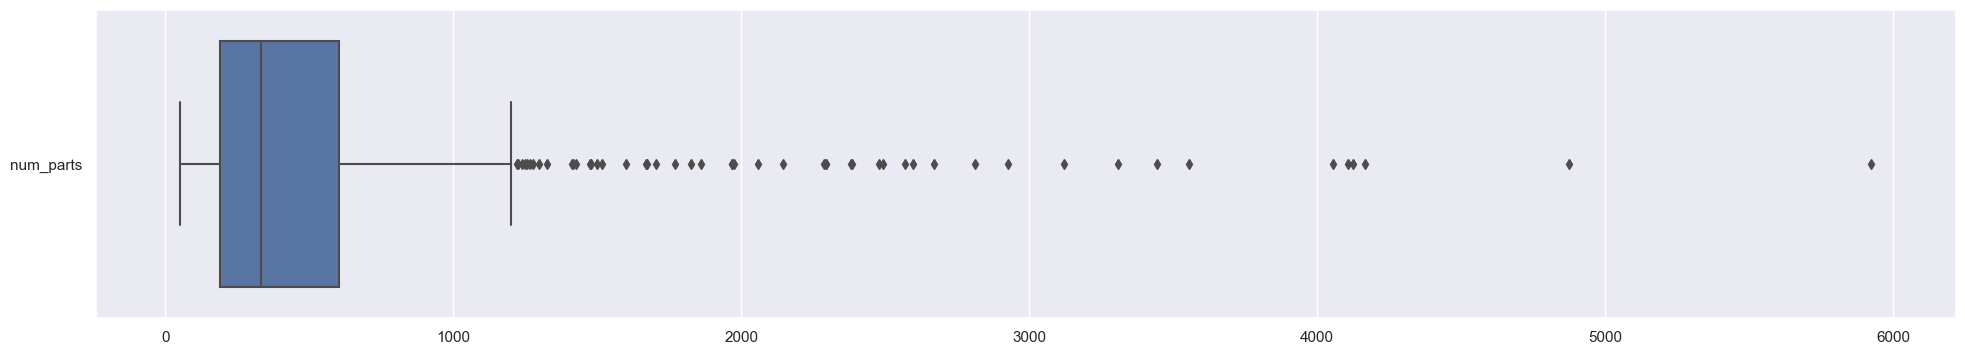

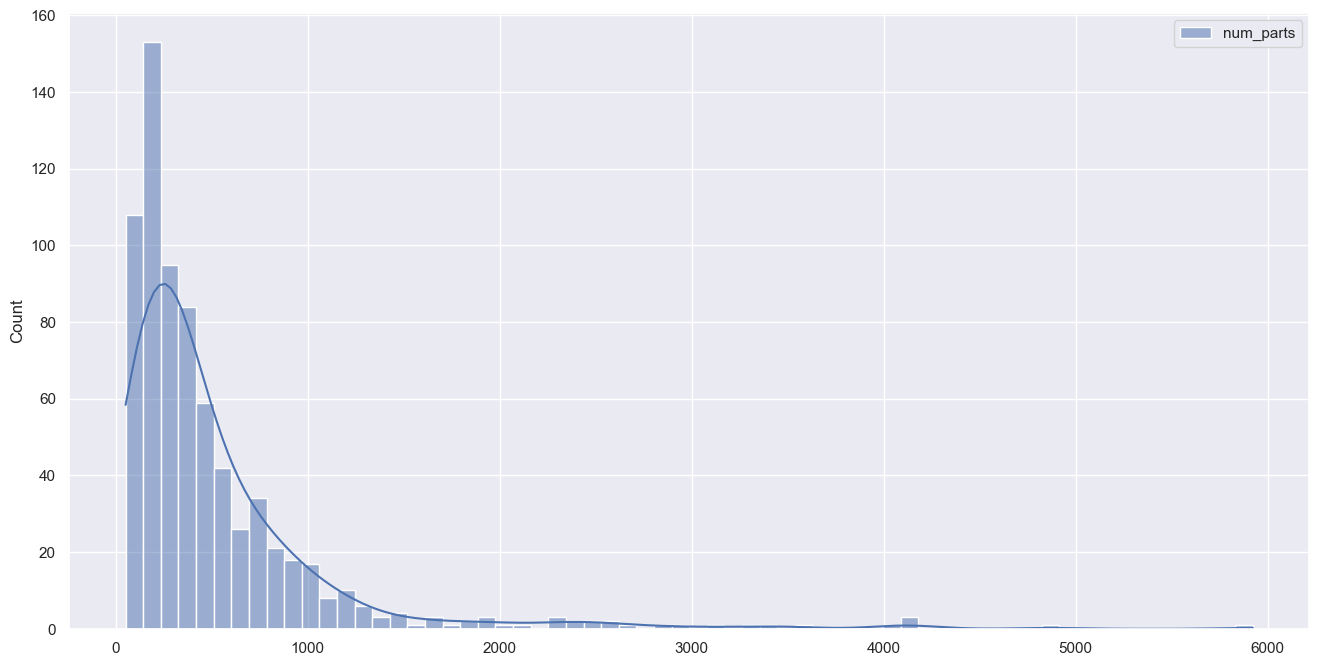

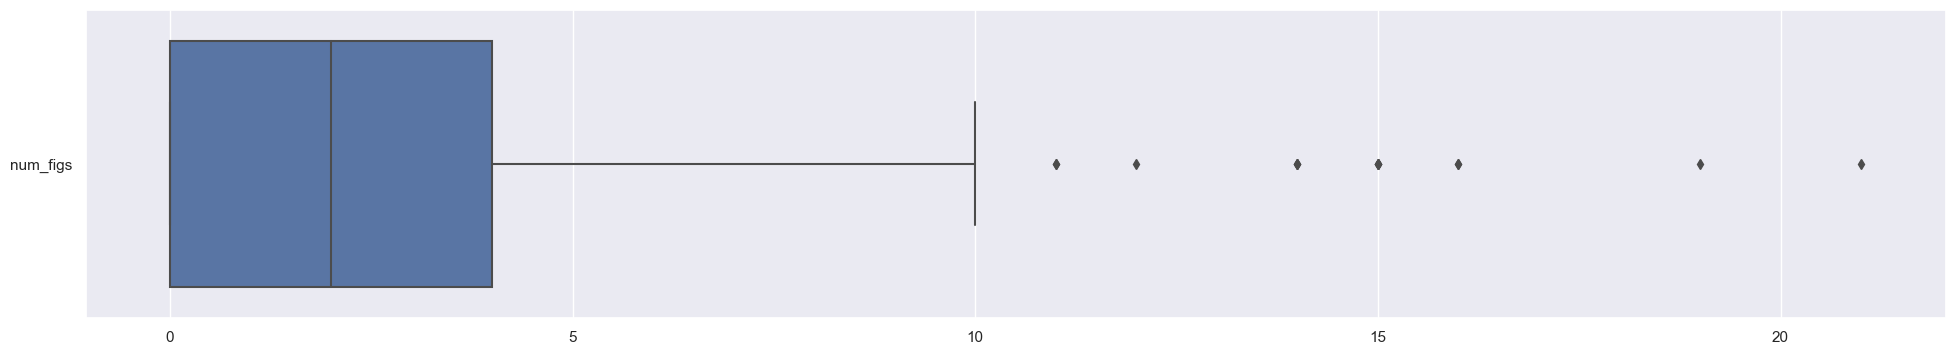

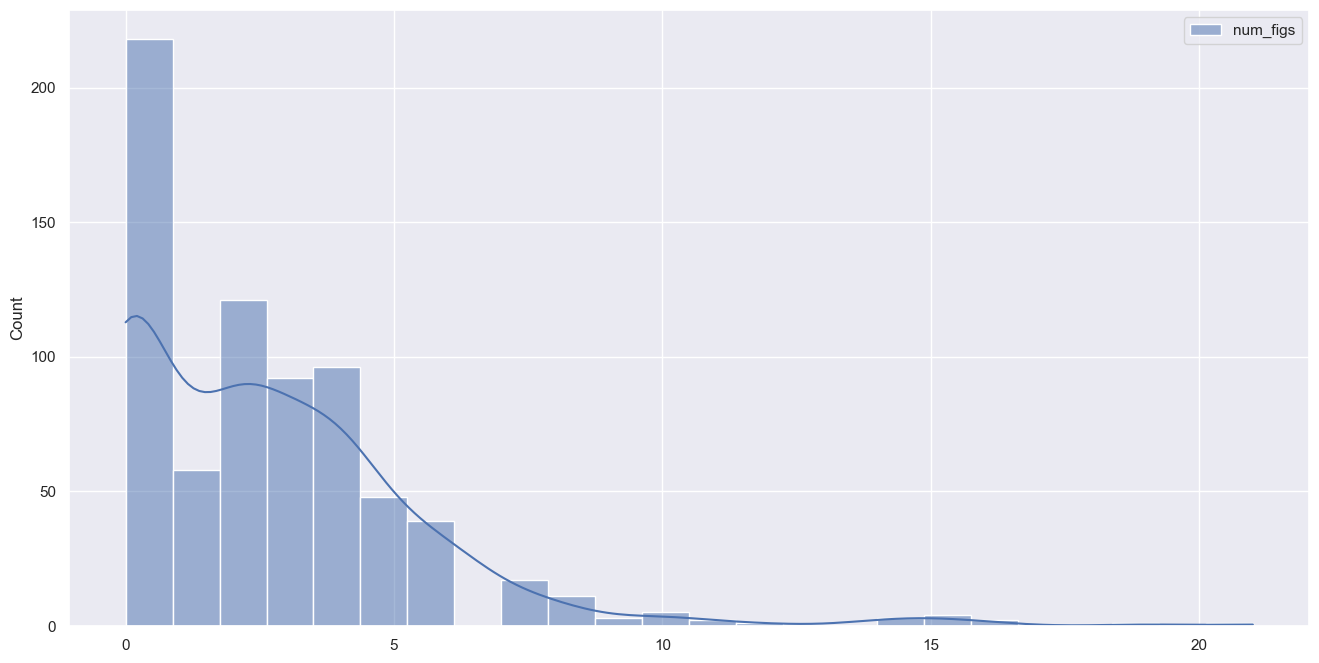

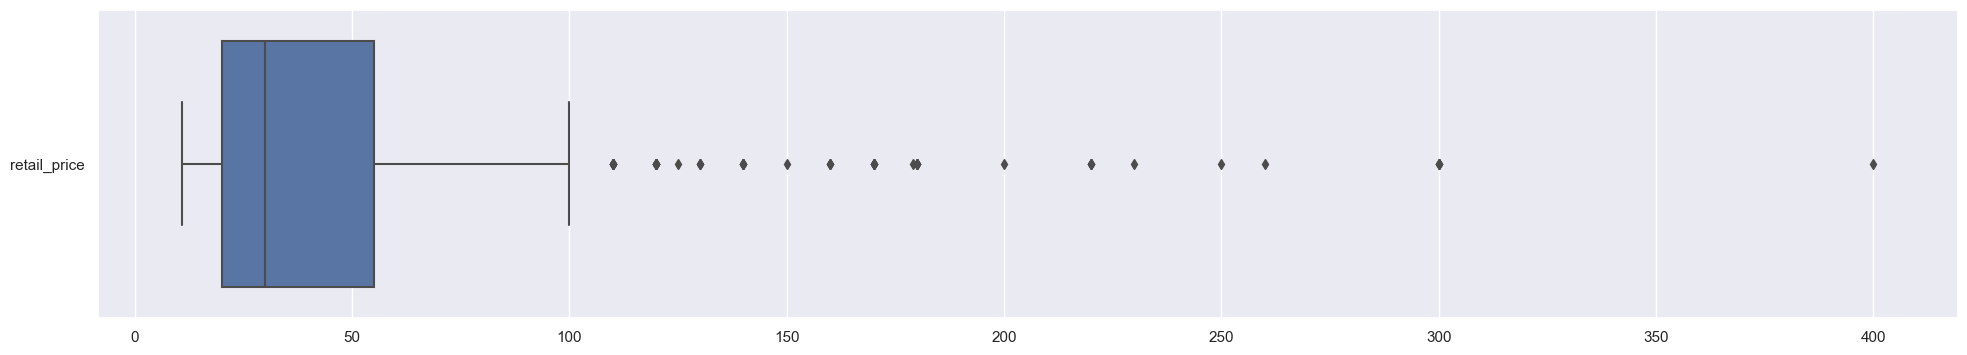

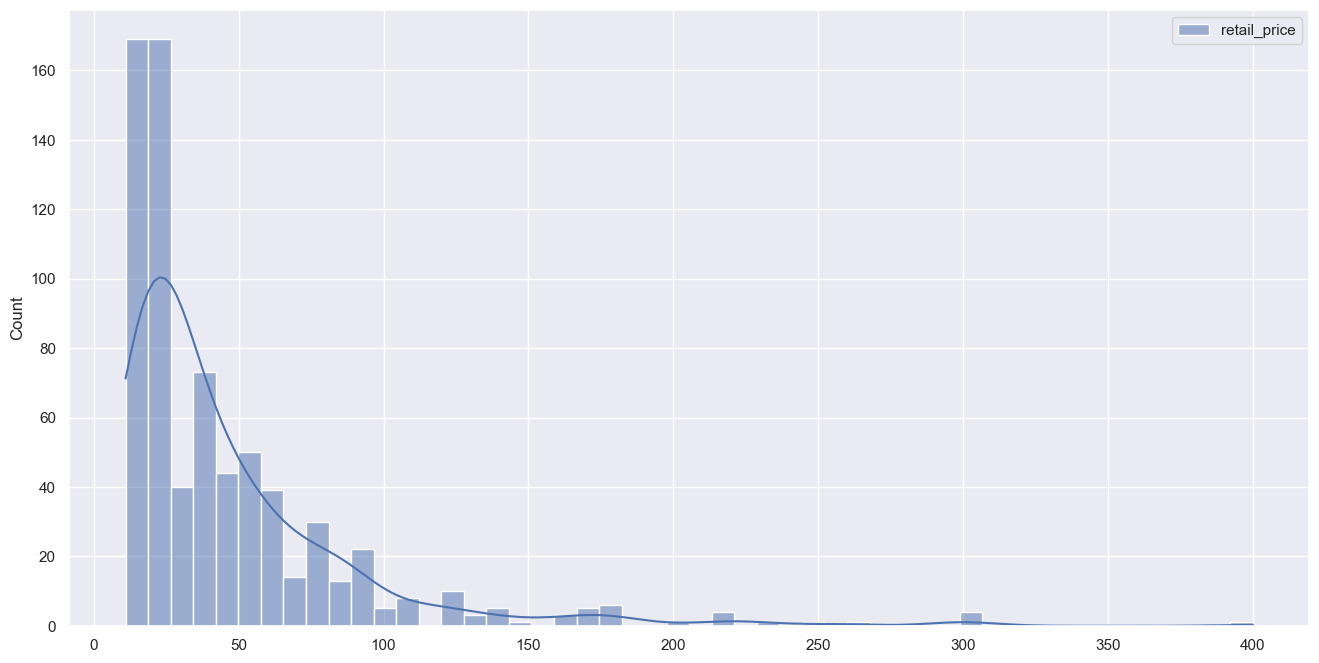

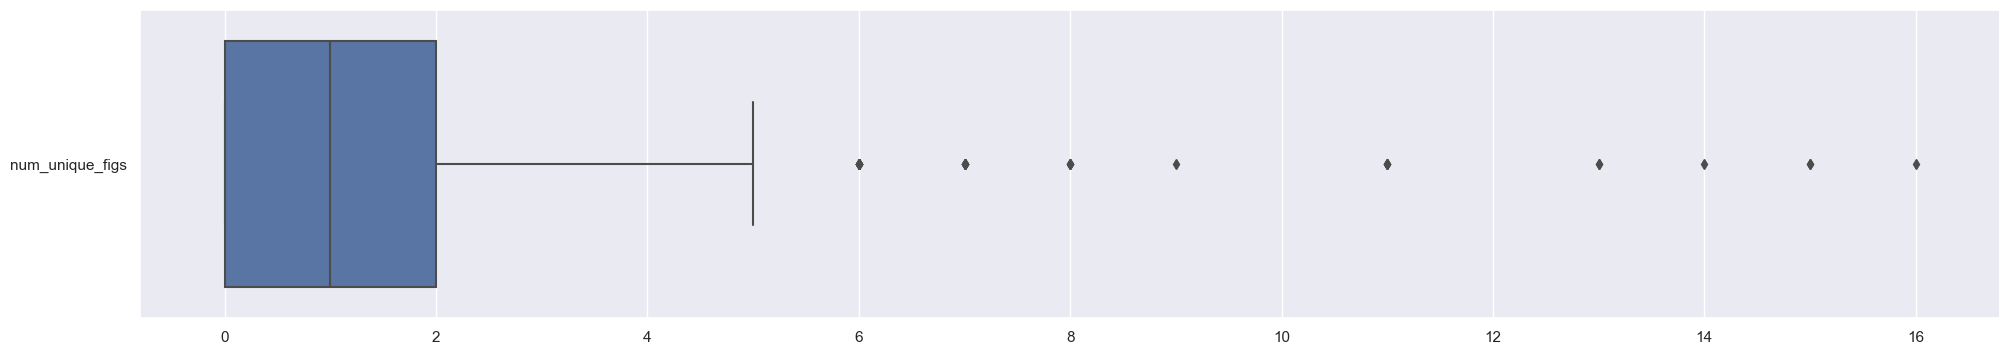

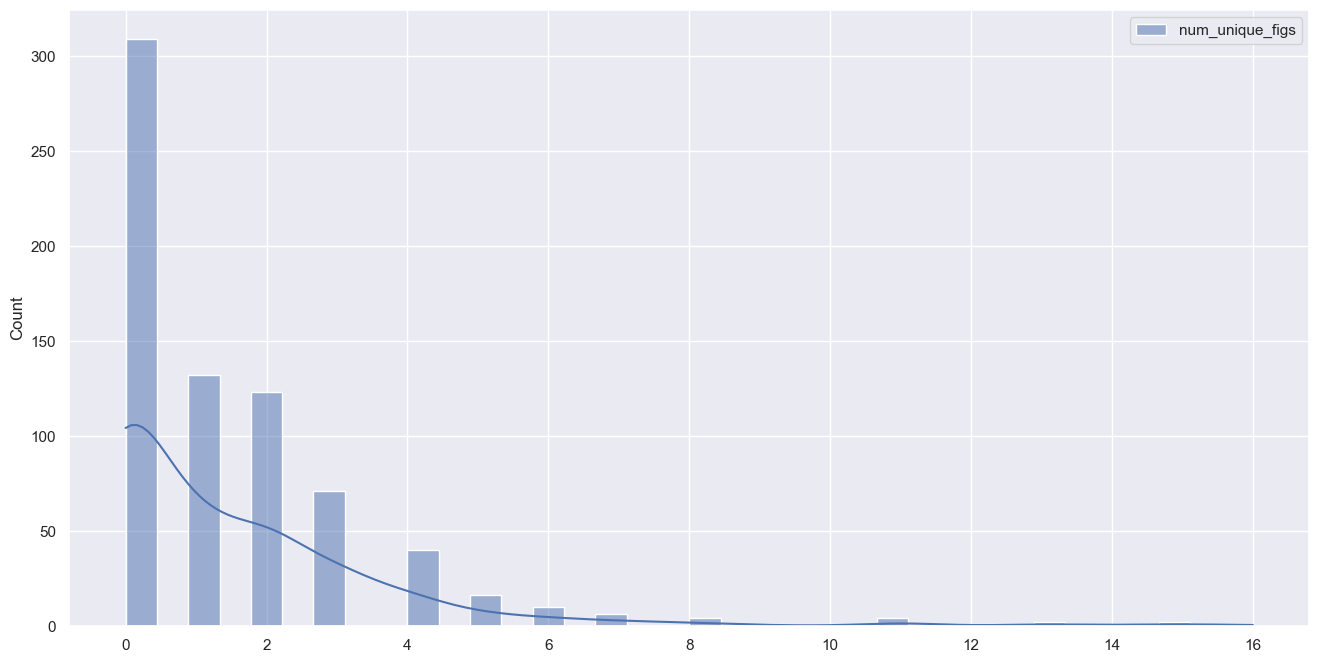

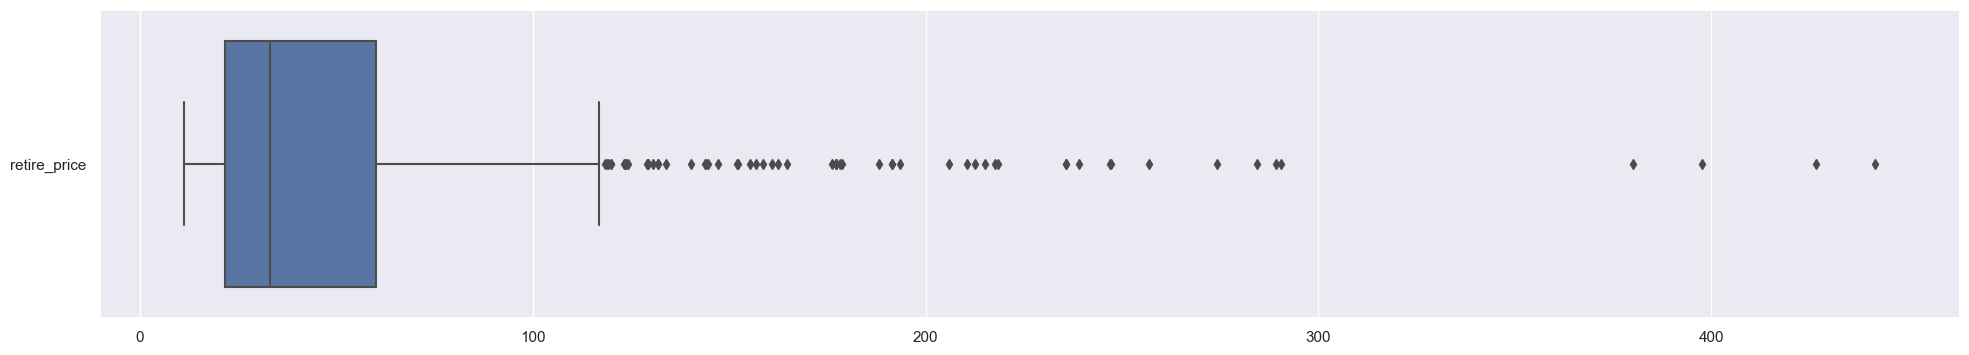

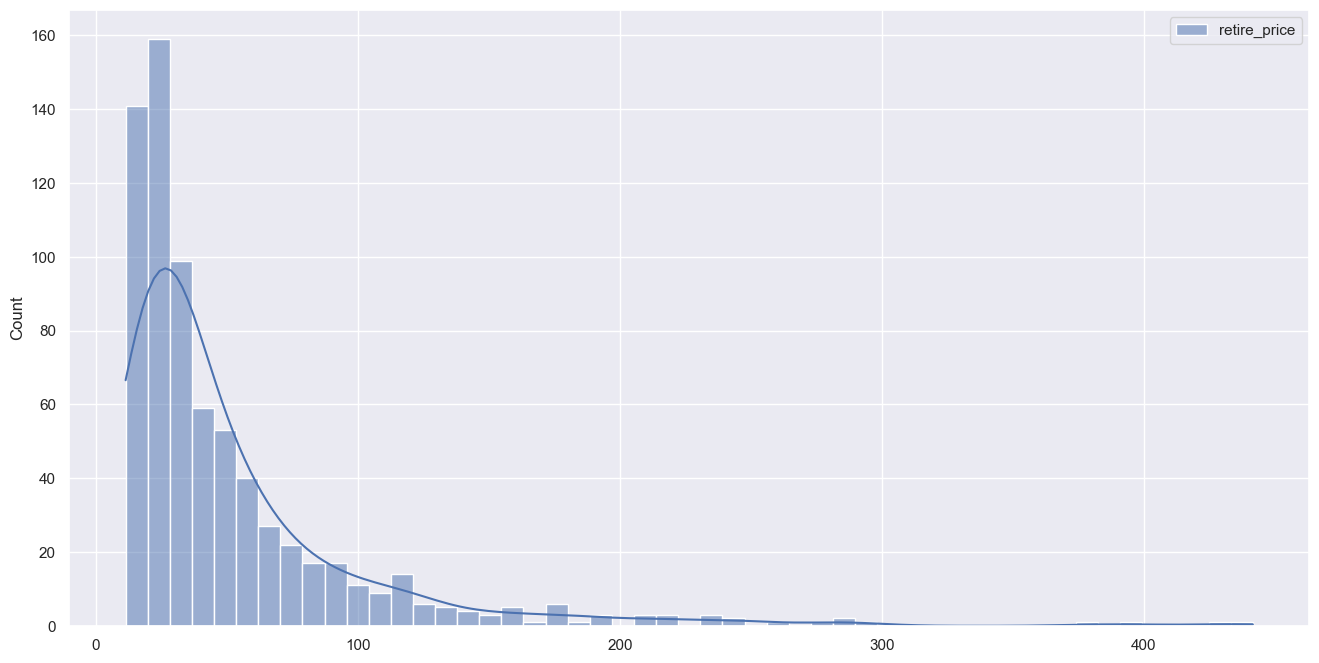

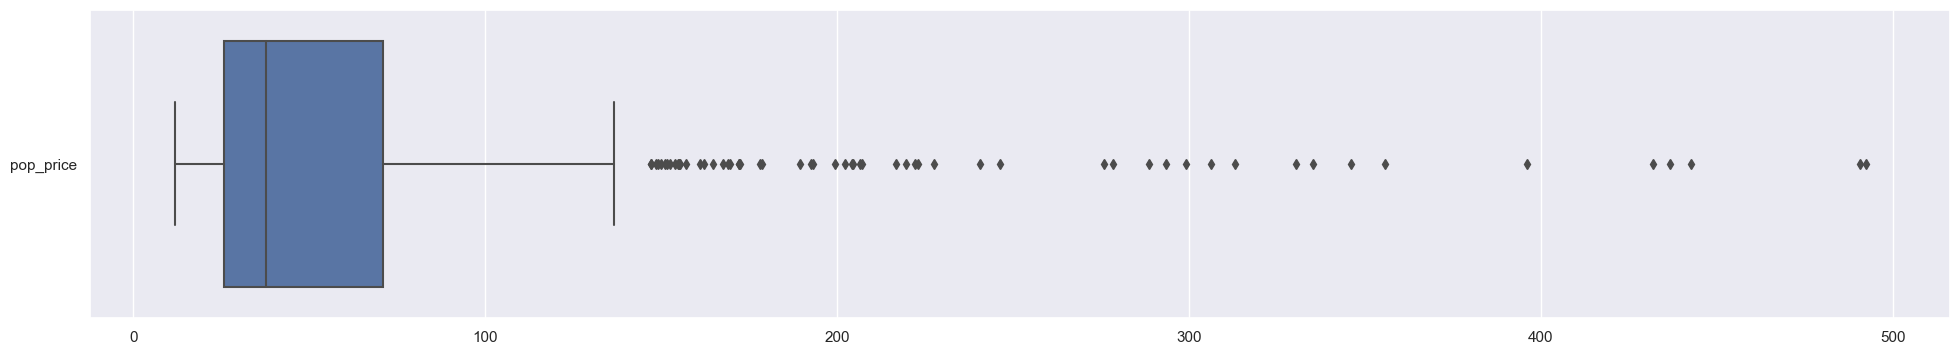

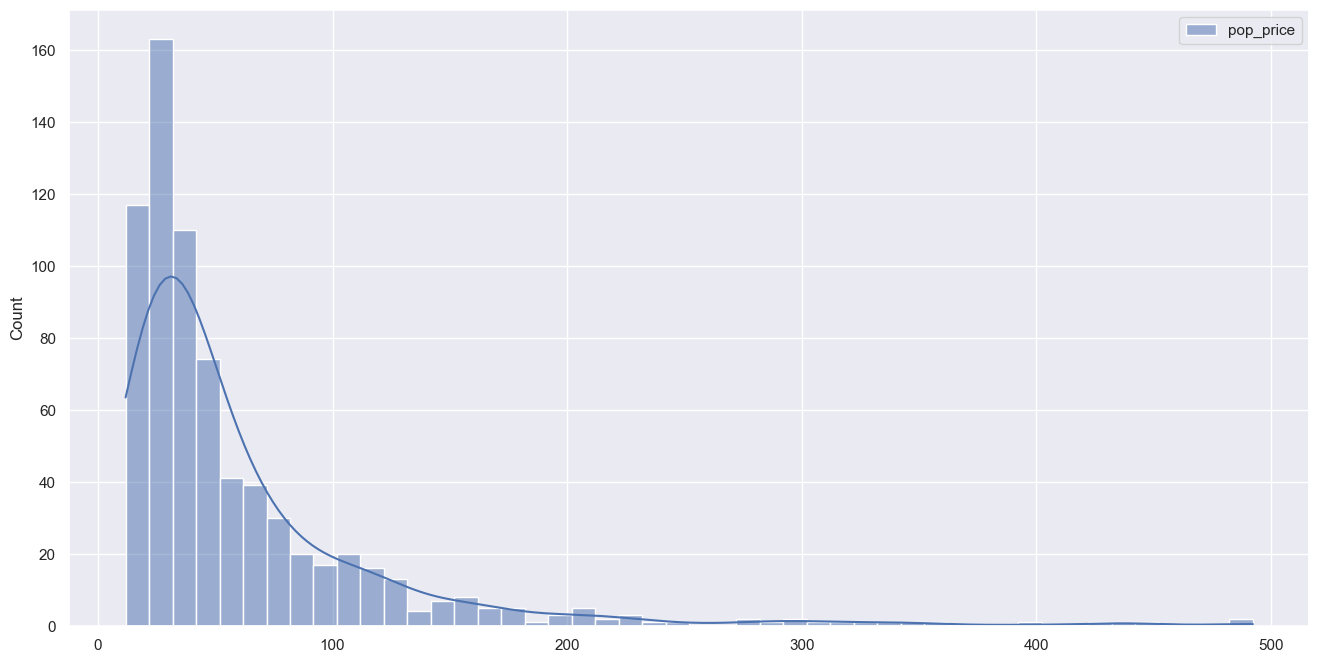

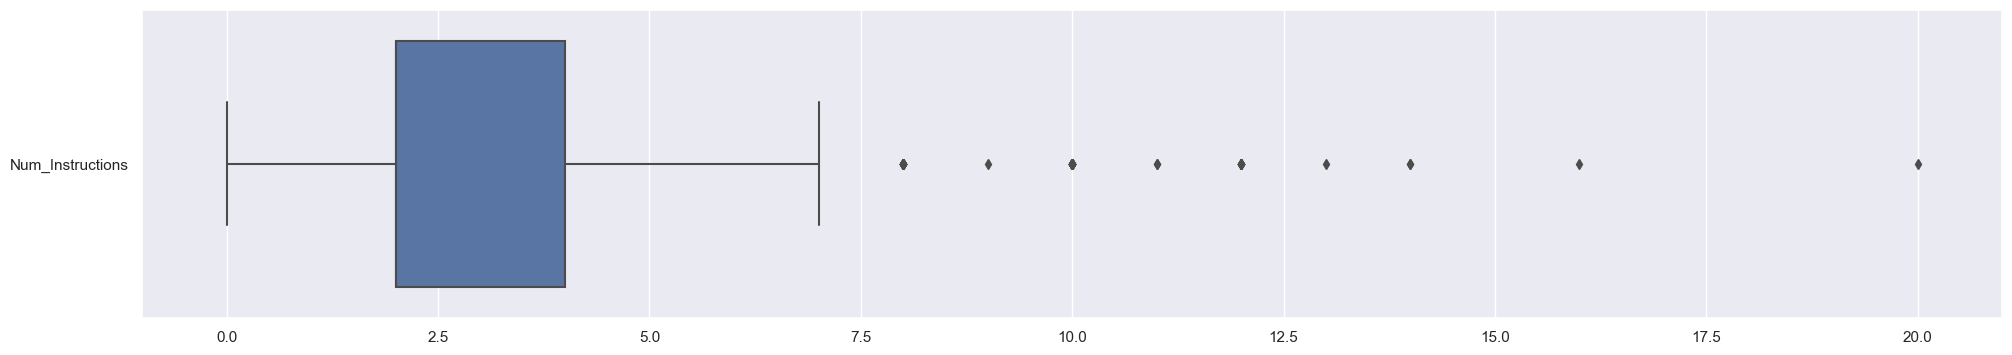

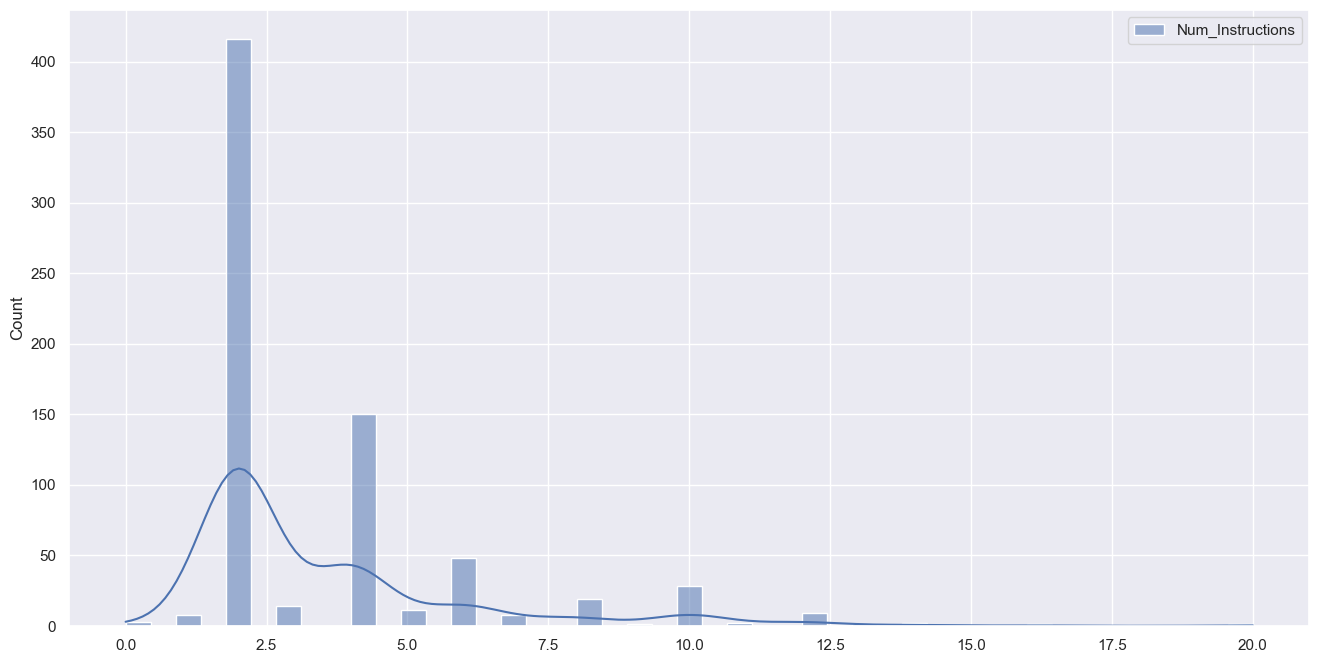

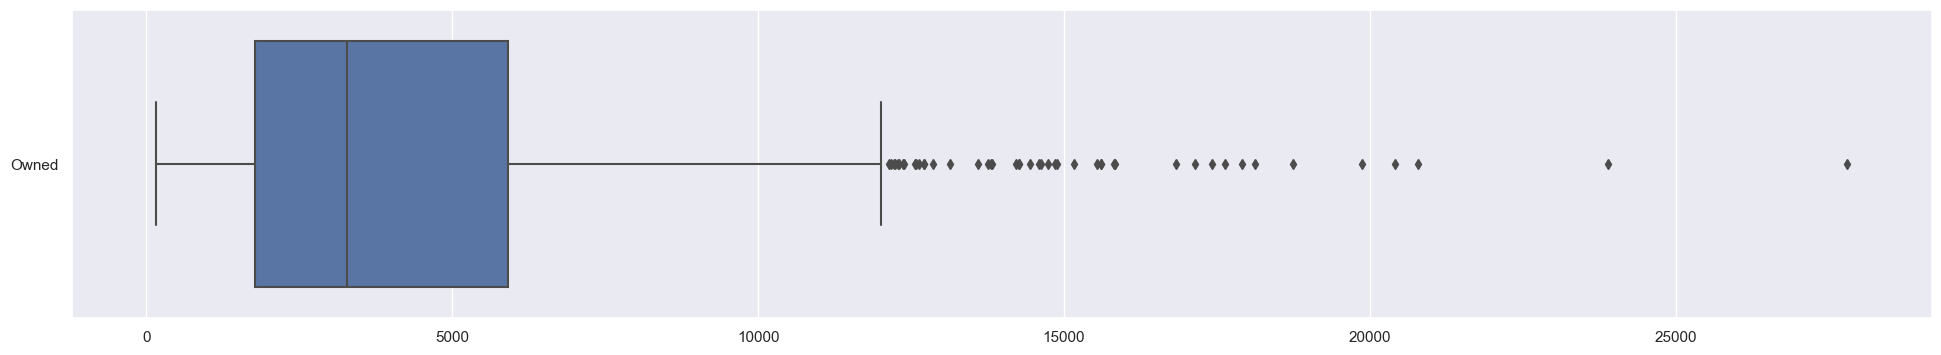

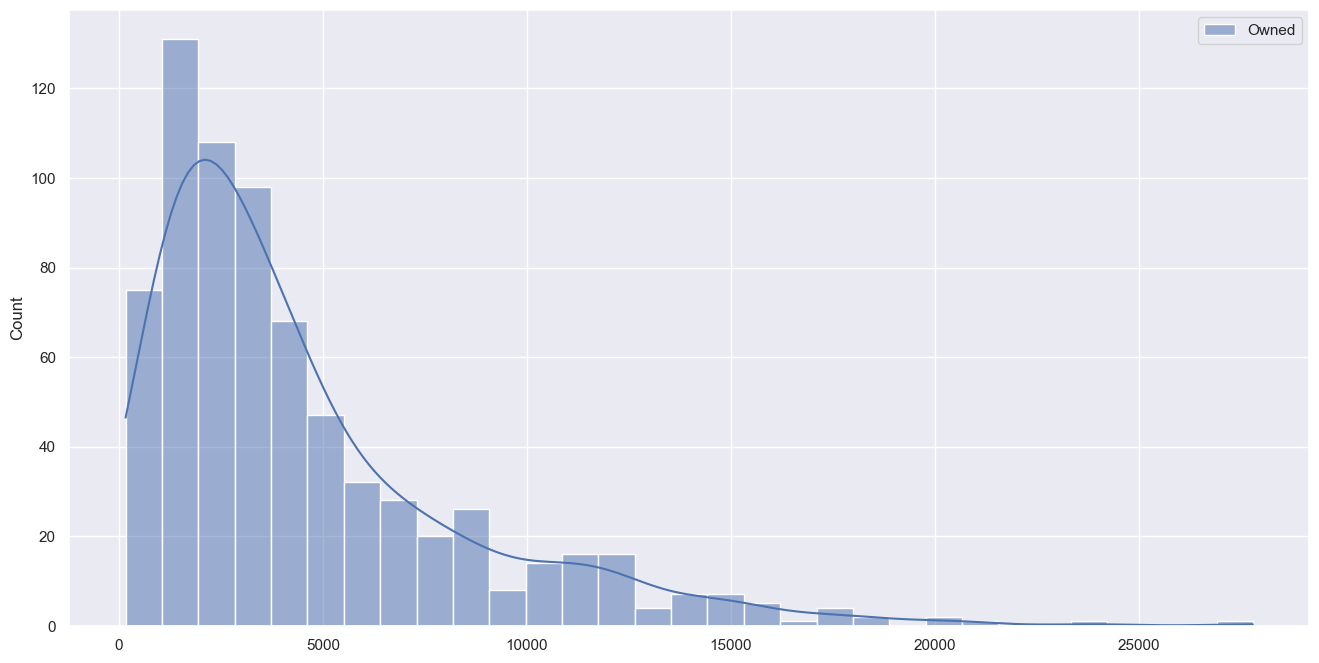

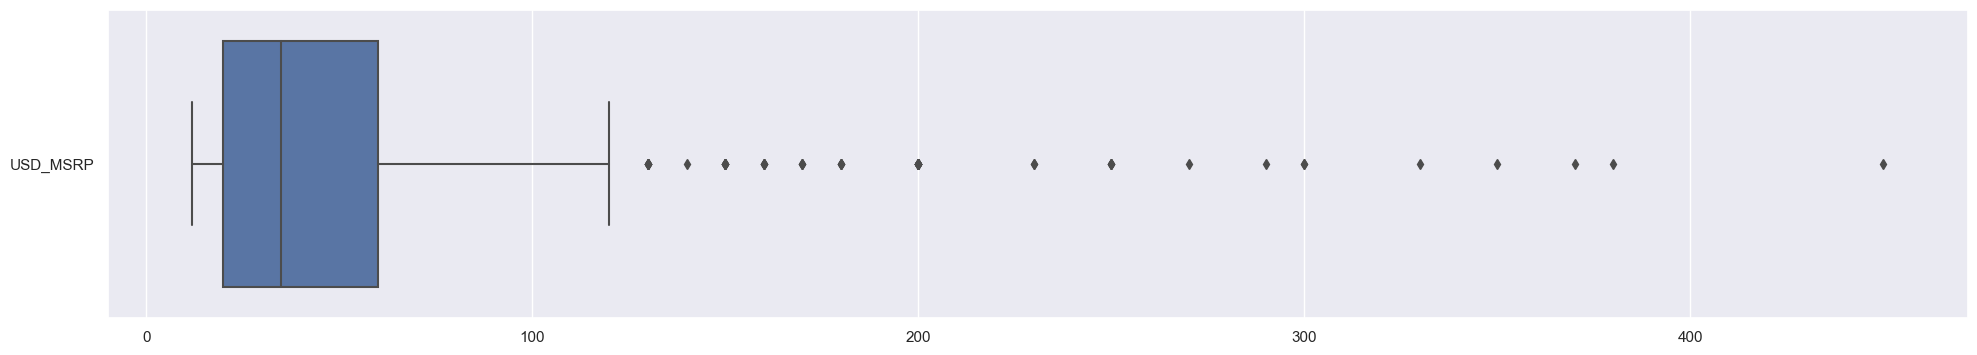

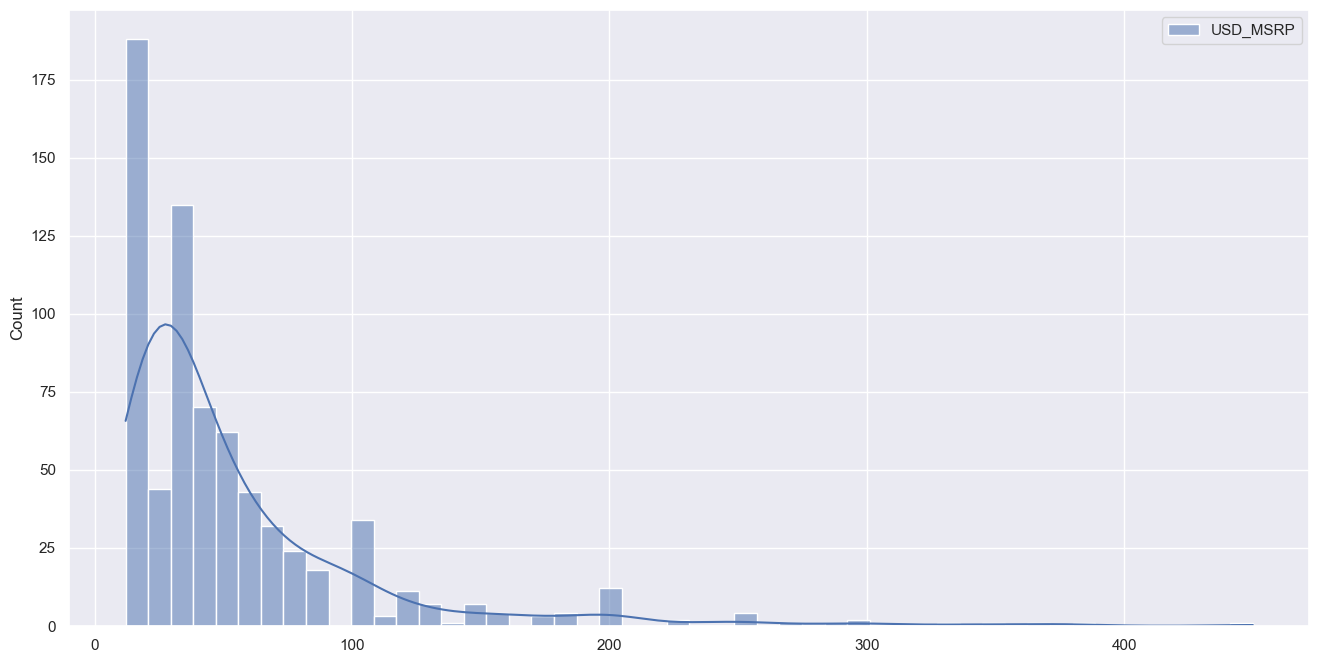

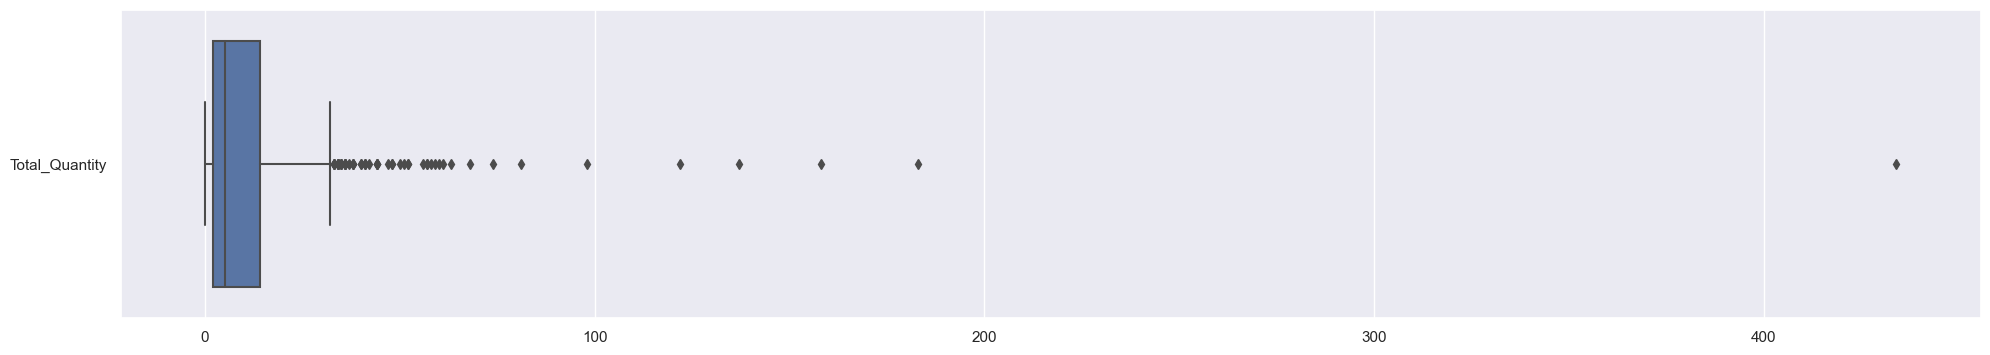

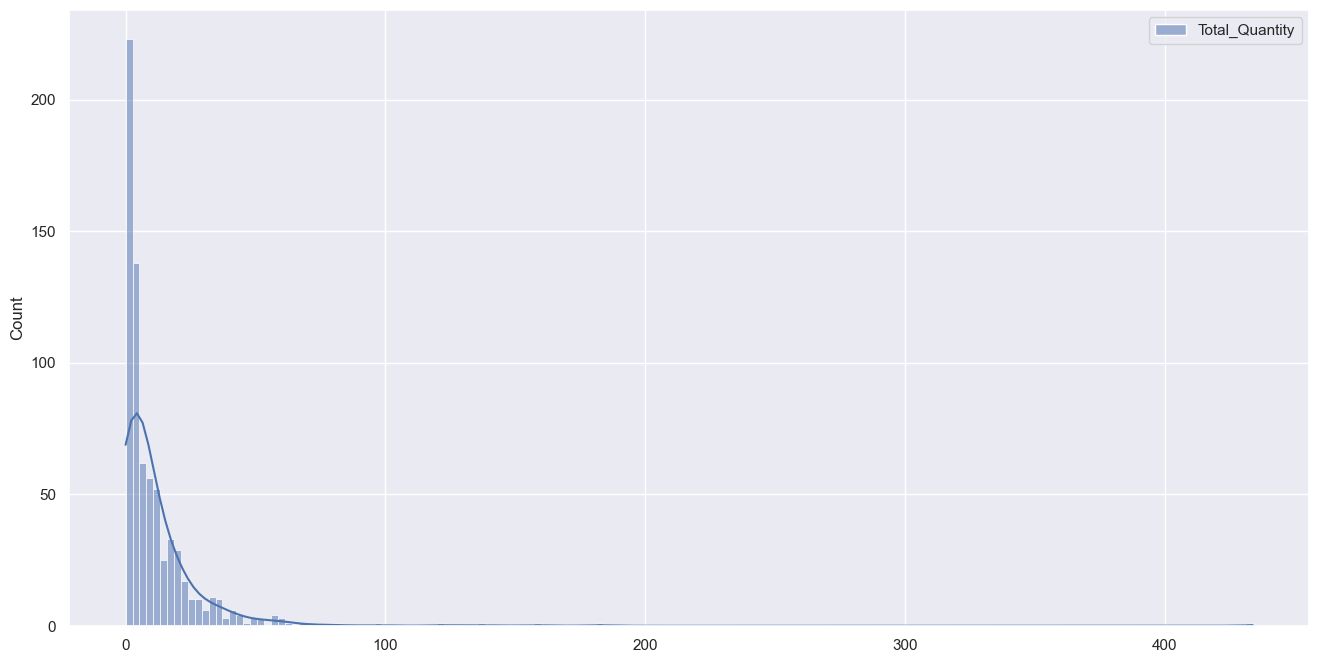

In [44]:
for var in numericalData:
    summary_stats_vis(var)

Summary statistics for Current_Price

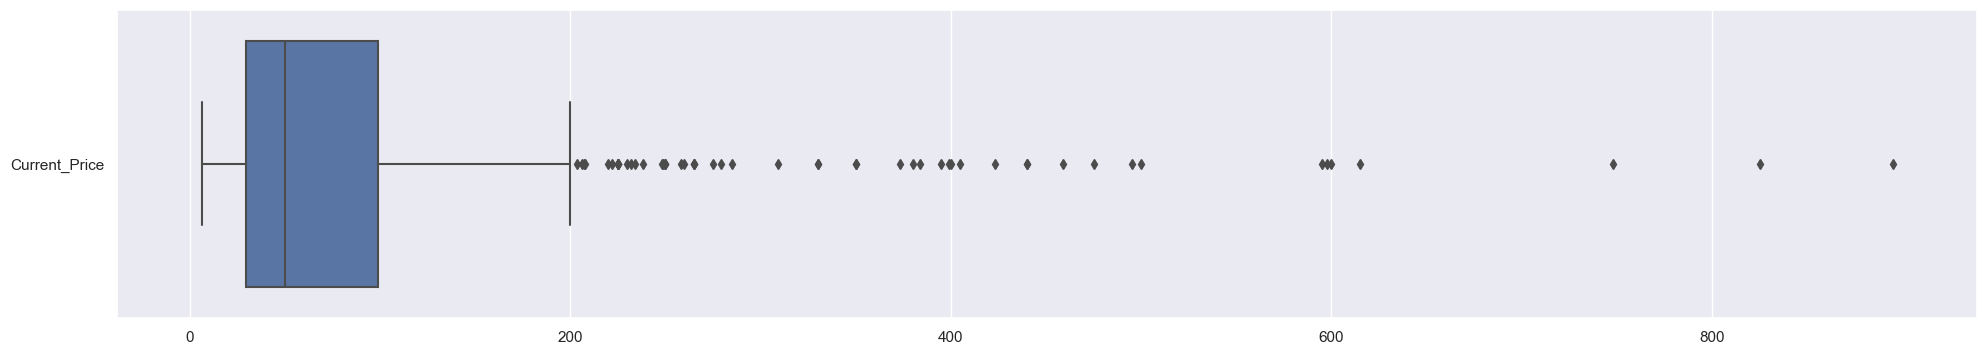

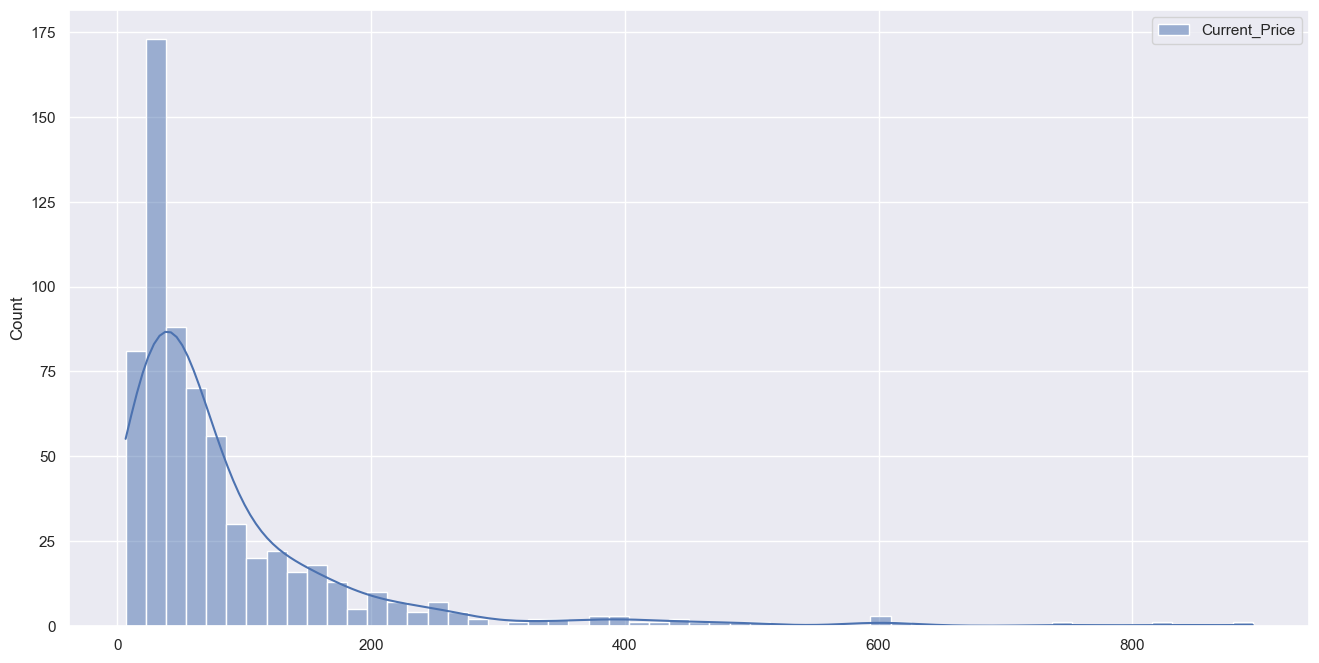

In [38]:
summary_stats_vis('Current_Price')

Function for jointplot against Current_Price

In [45]:
Current_Price = pd.DataFrame(legoData["Current_Price"])
def jointplot(var):
    var_df = pd.DataFrame(legoData[var])
    jointDF = pd.concat([Current_Price, var_df],axis = 1)
    sb.jointplot(data = jointDF, x = var, y = "Current_Price", height = 12)

Joint plot of Current_Price against numerical data

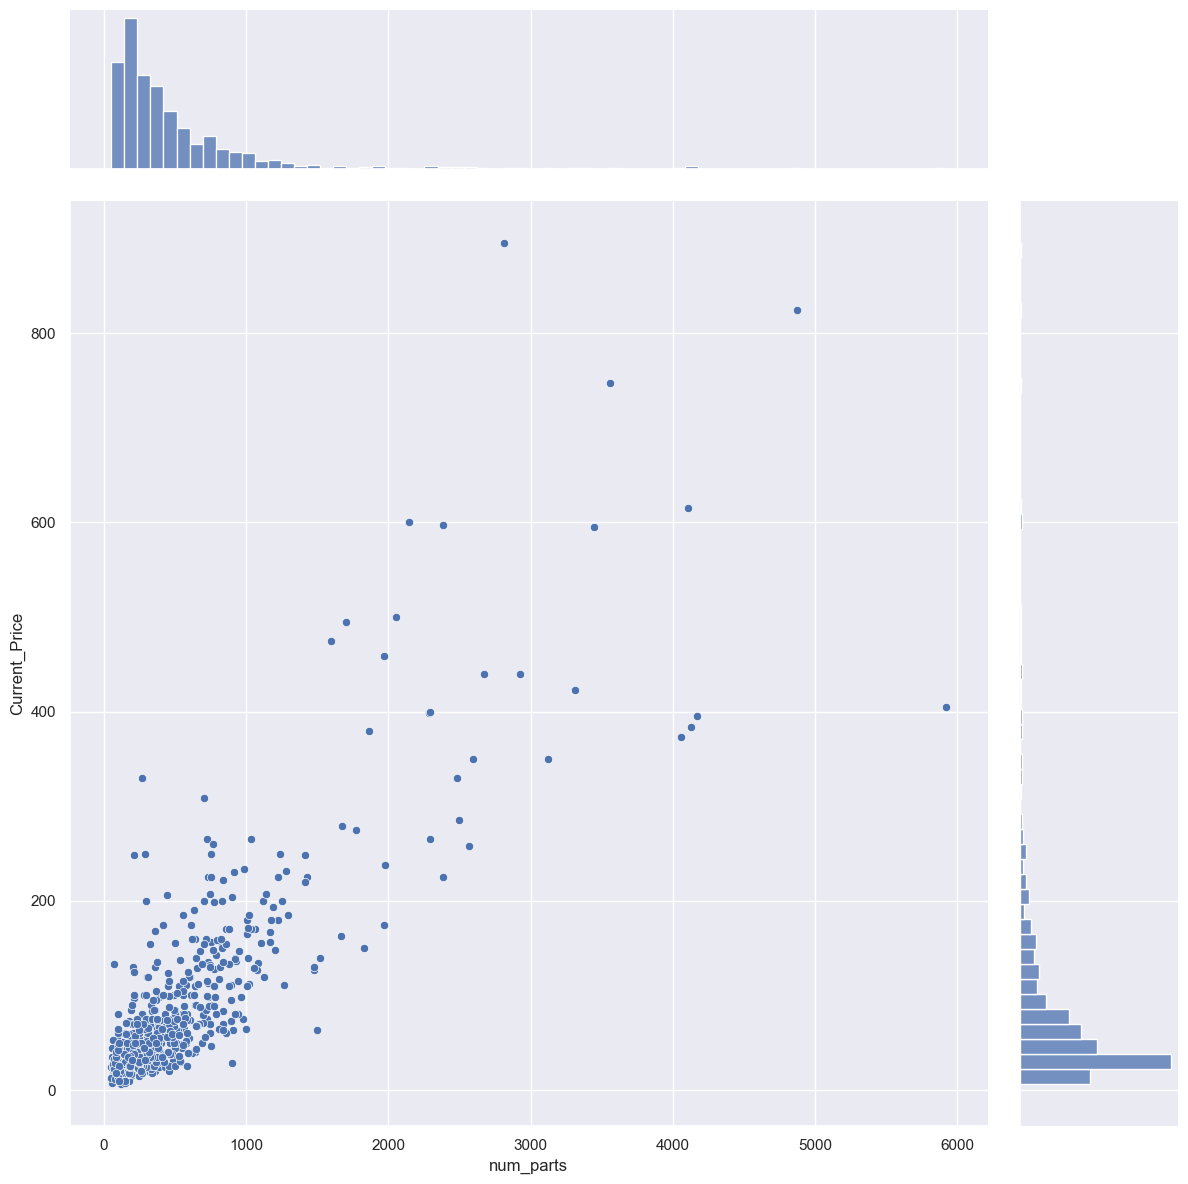

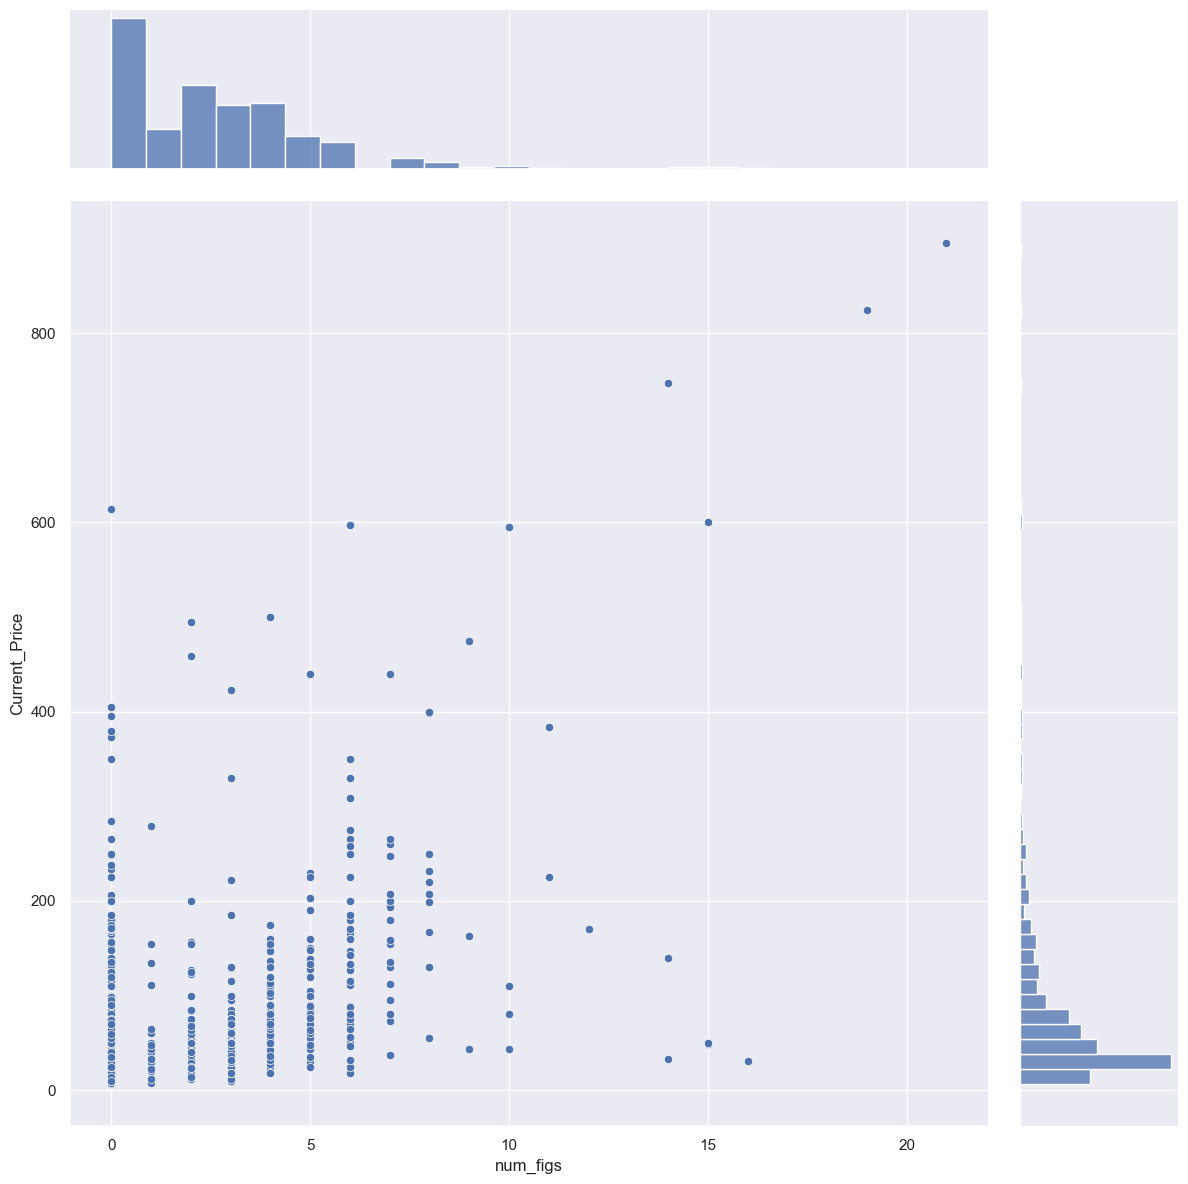

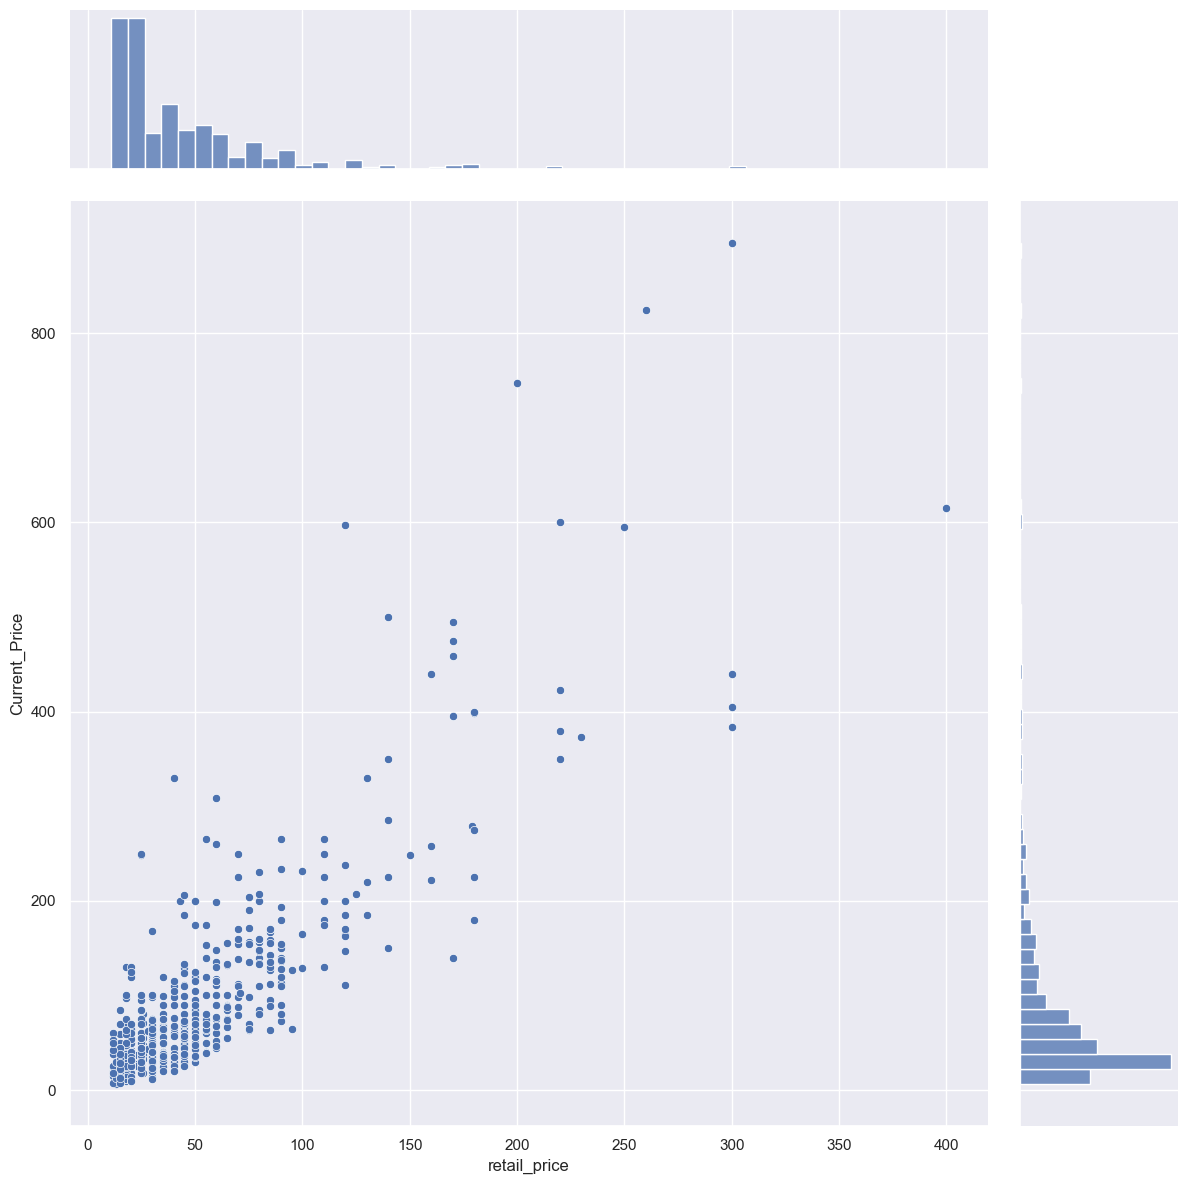

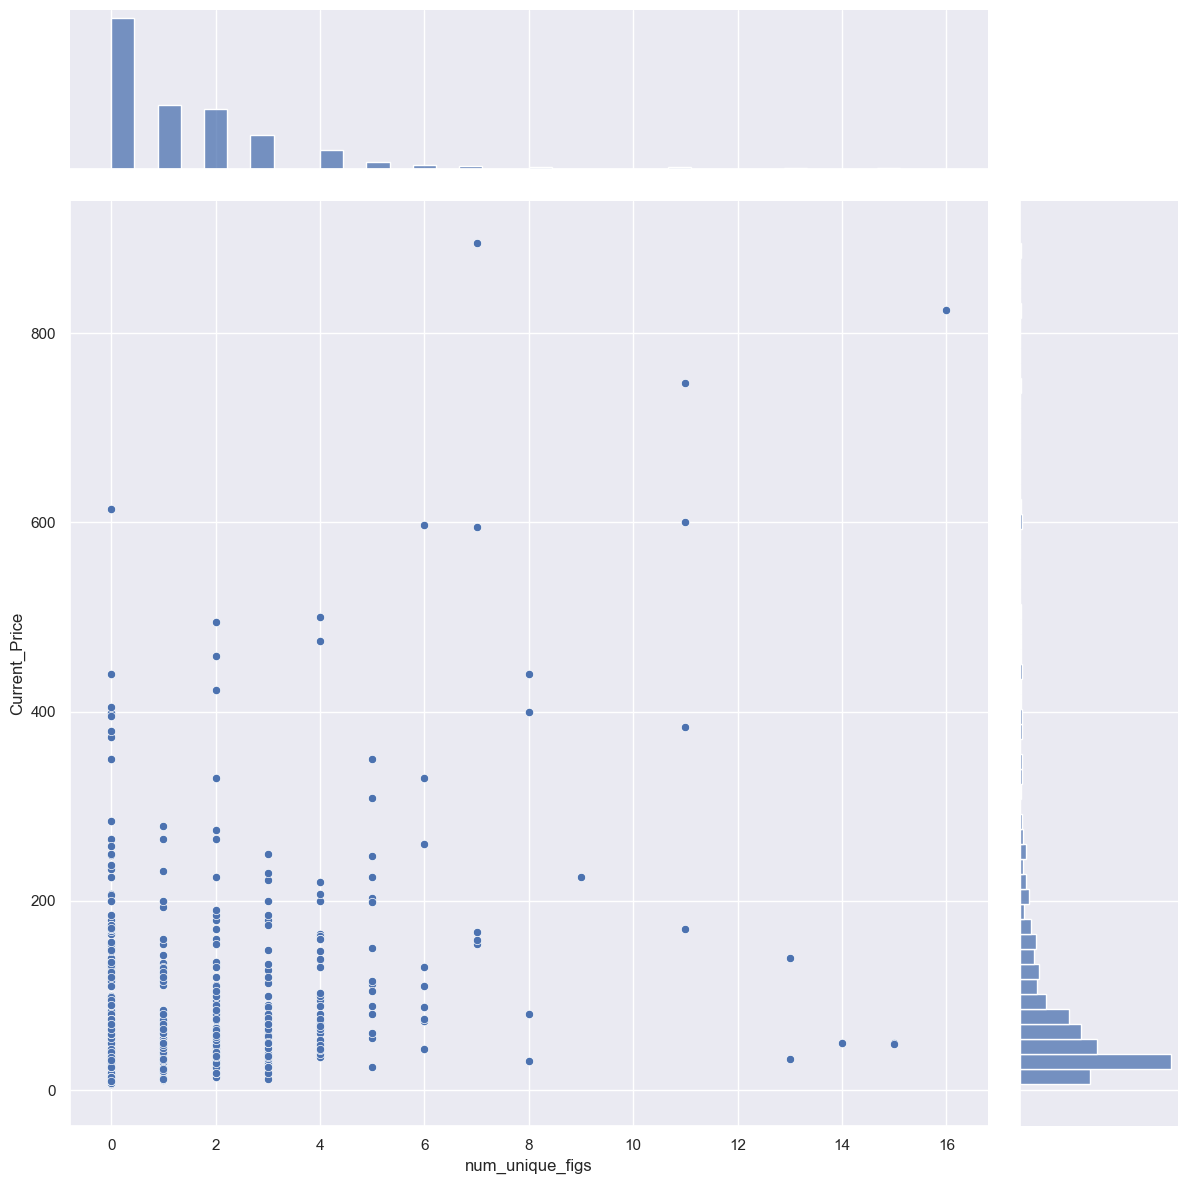

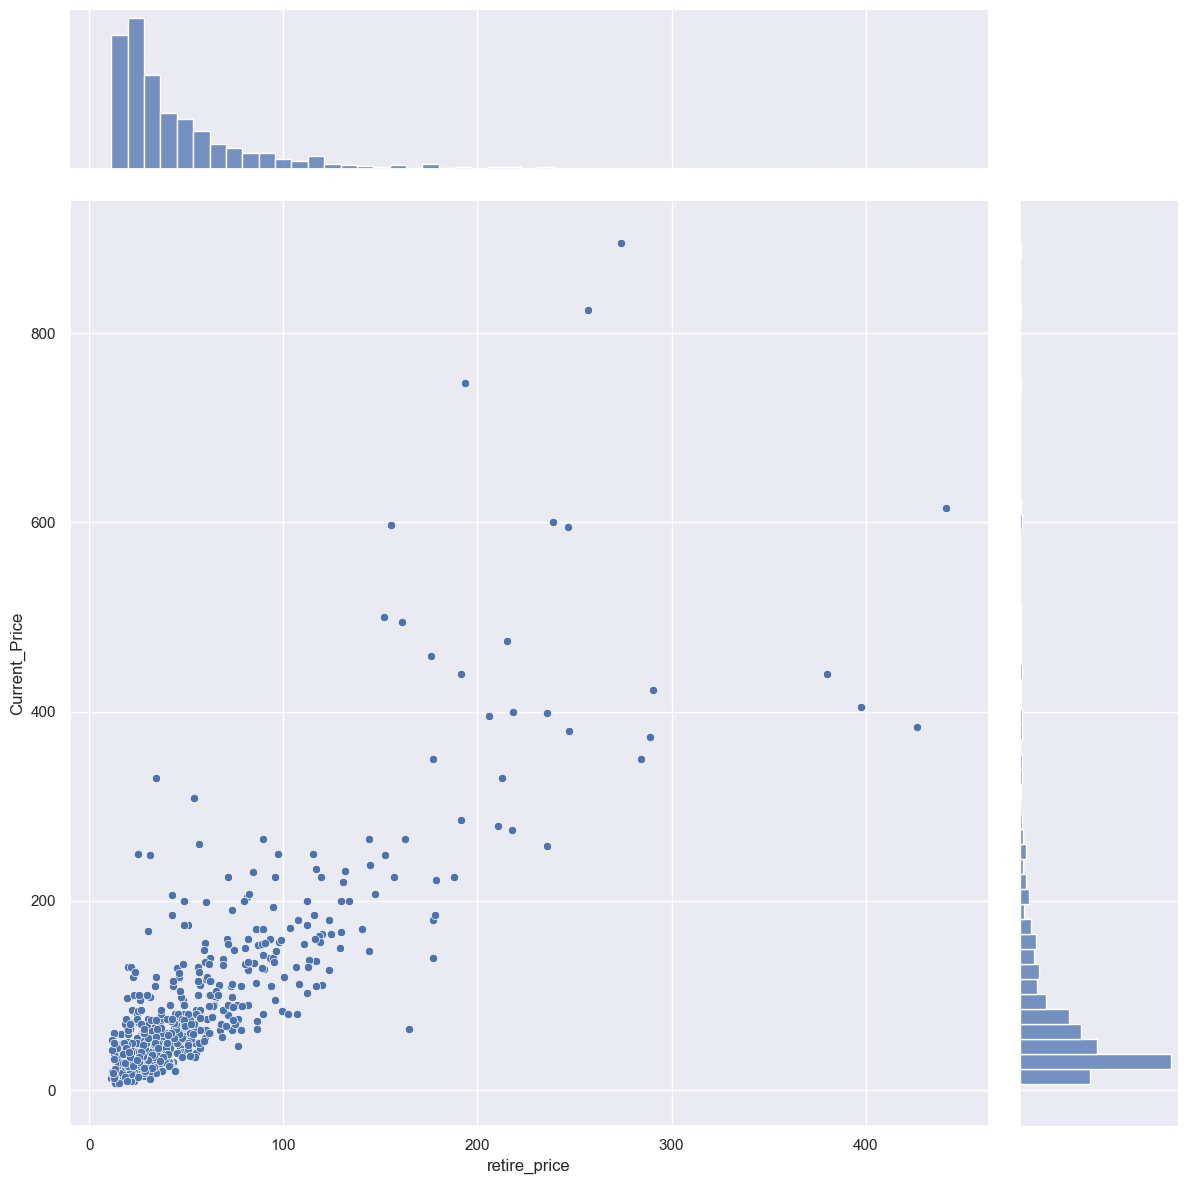

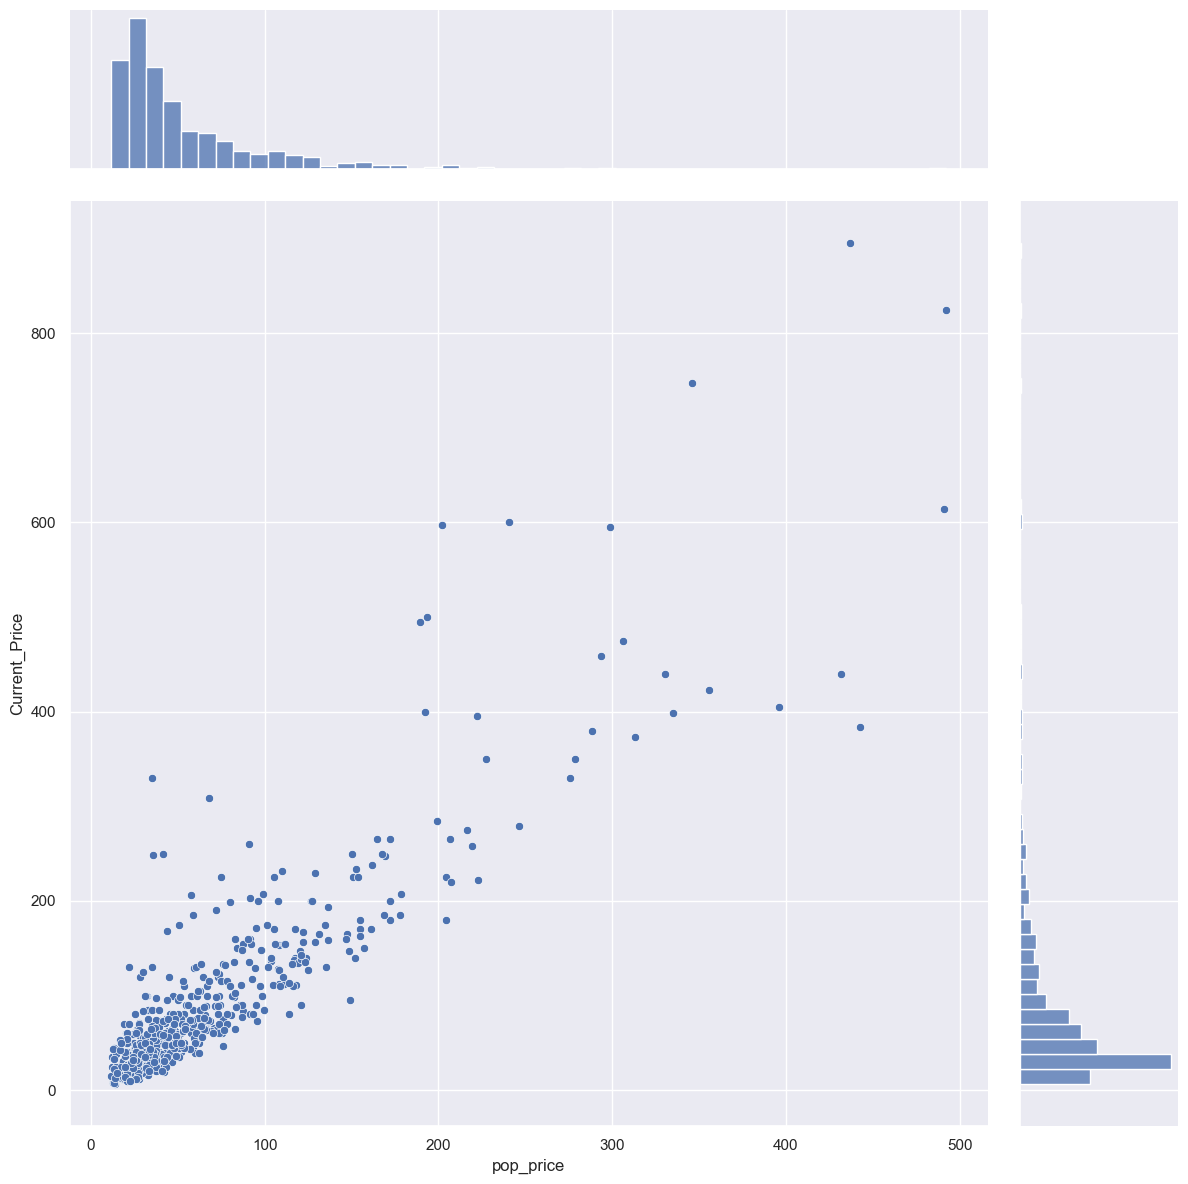

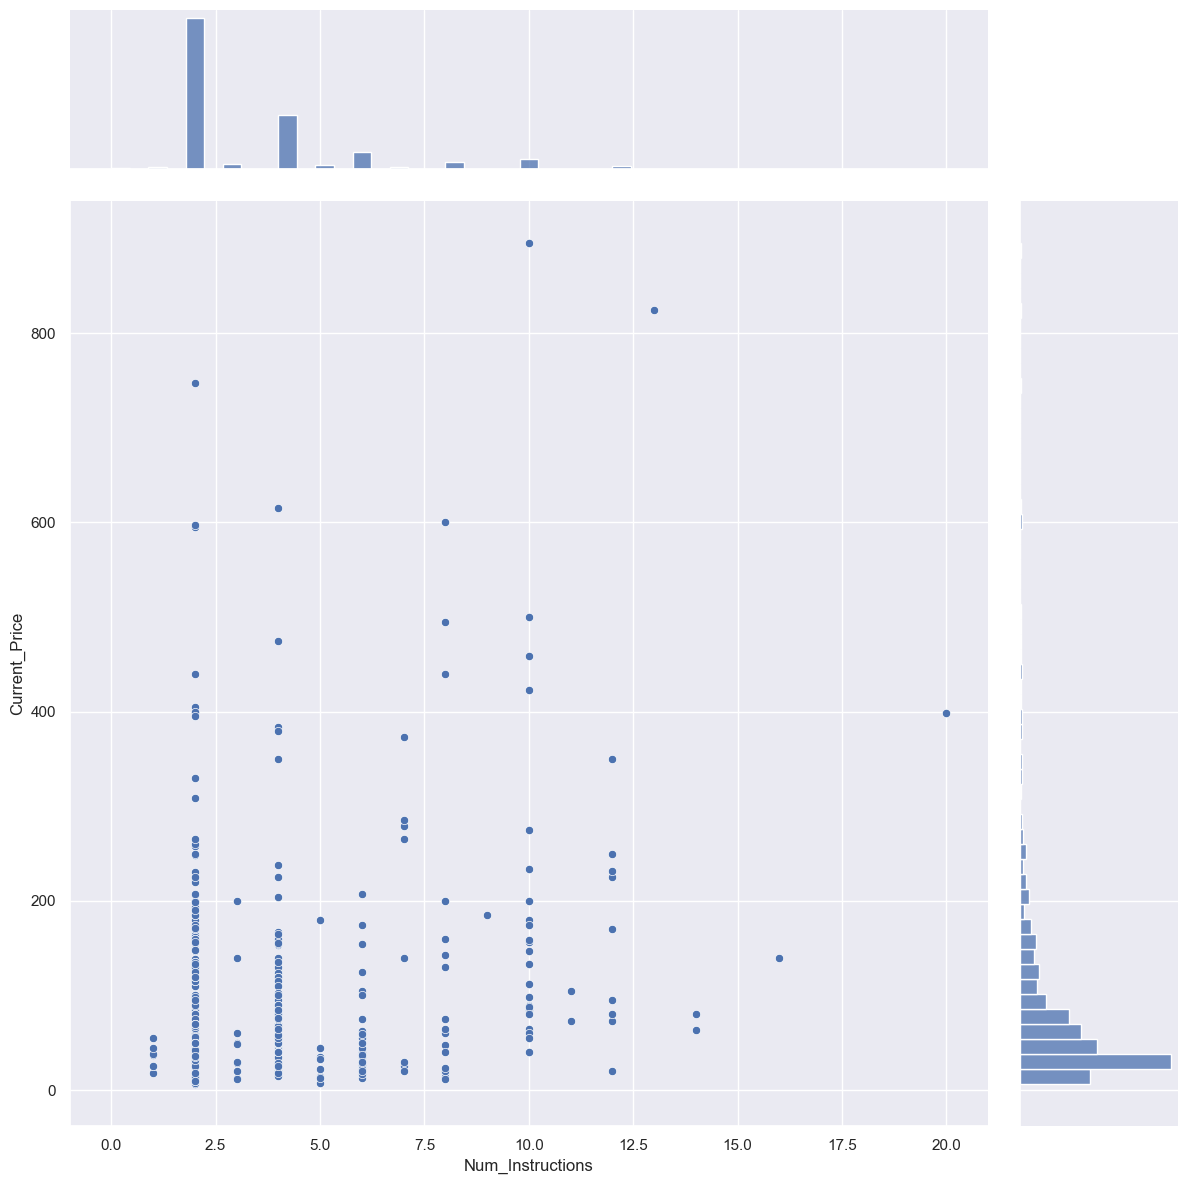

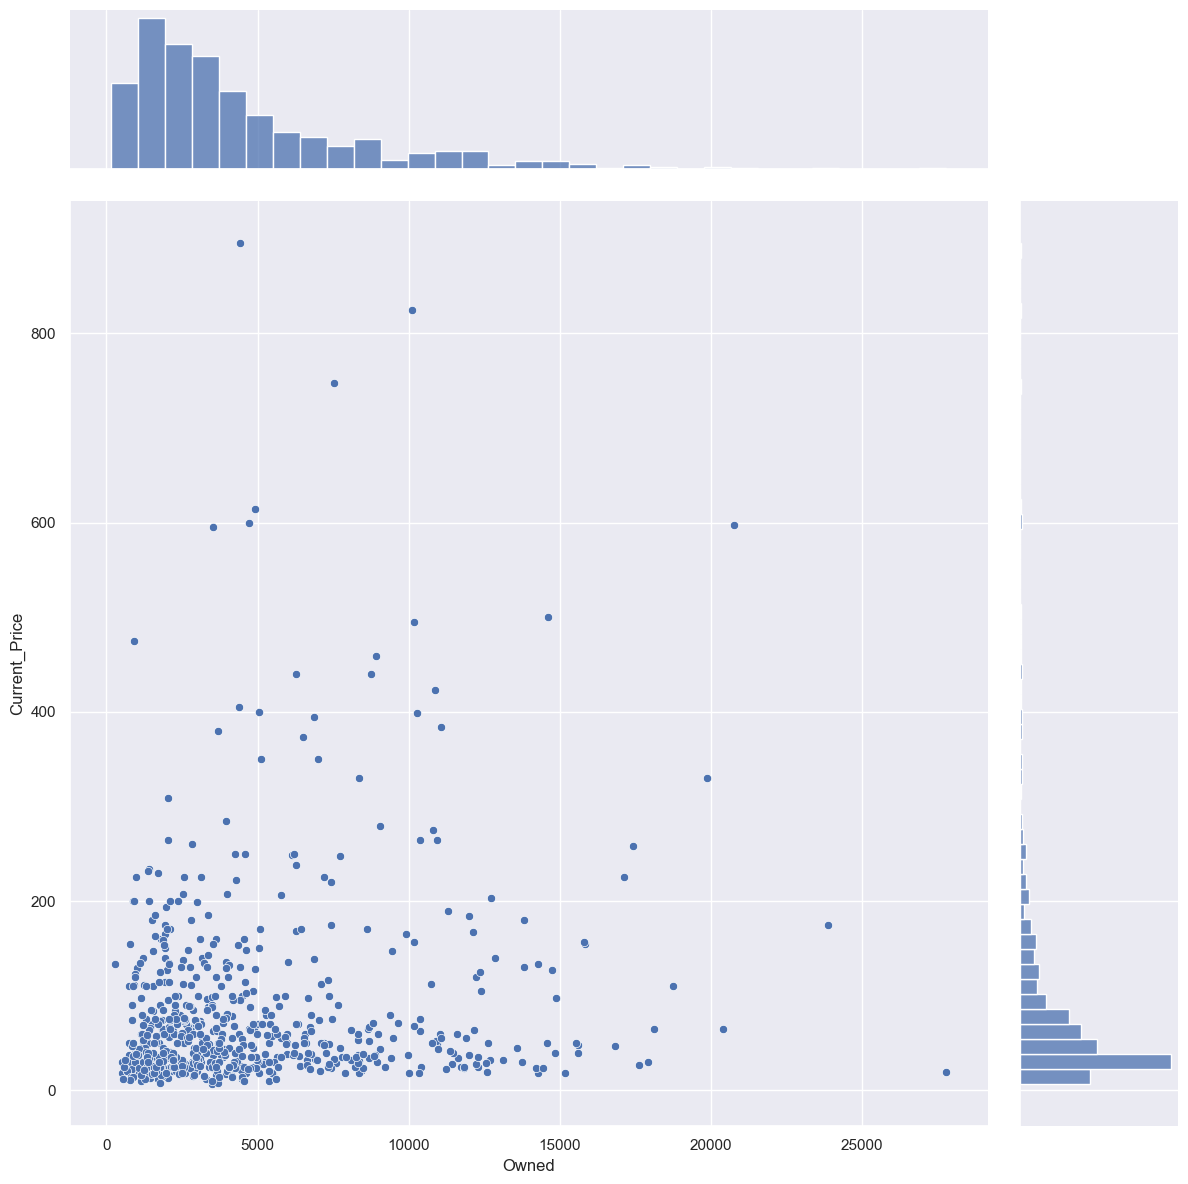

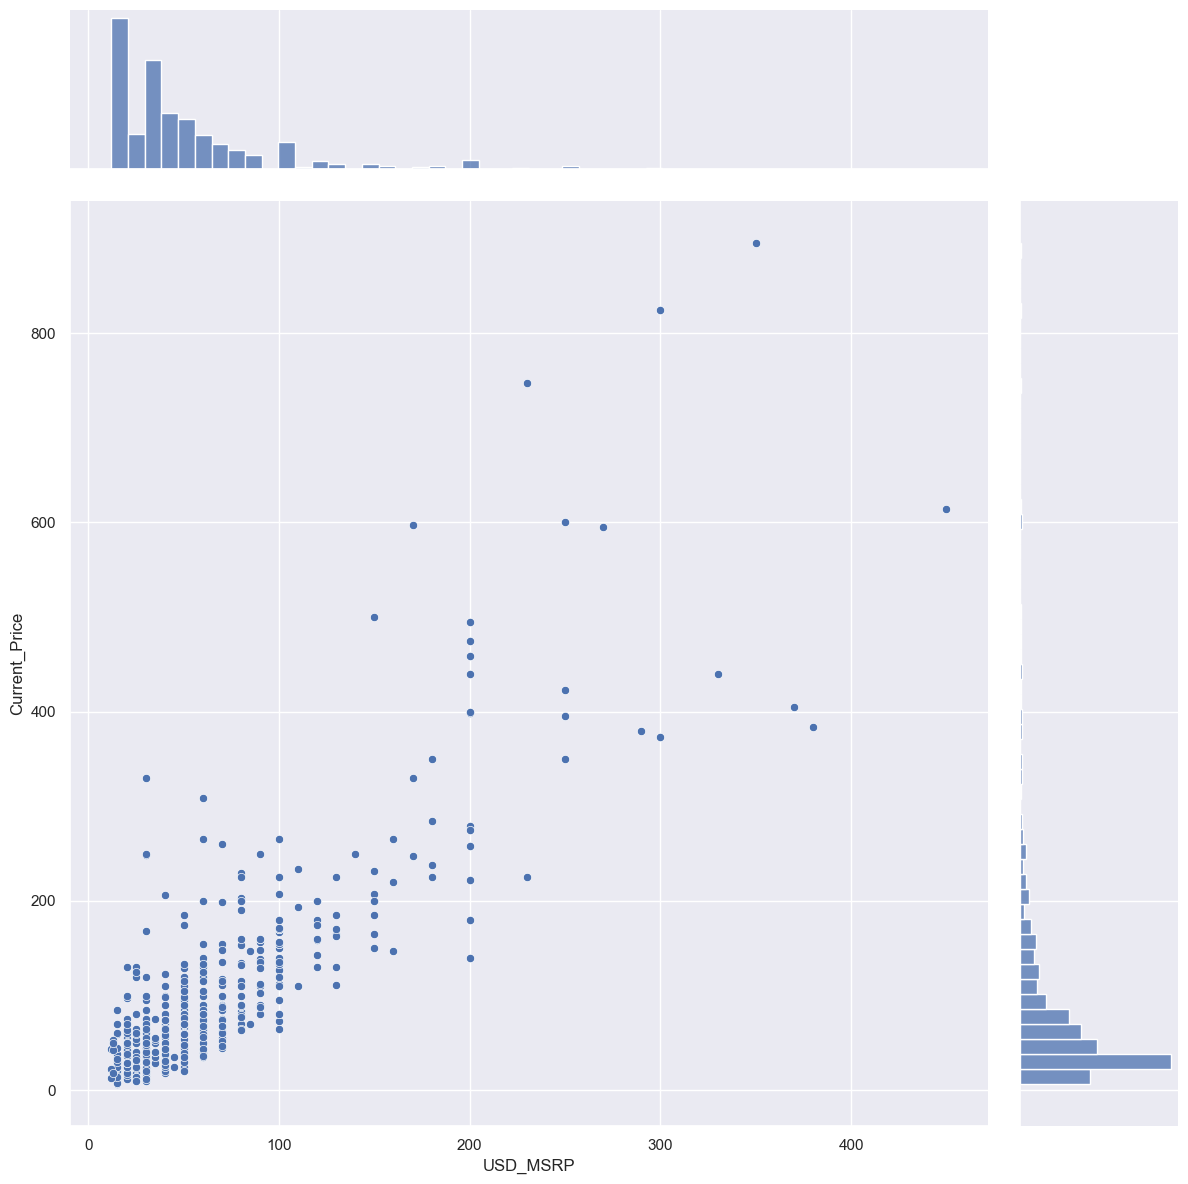

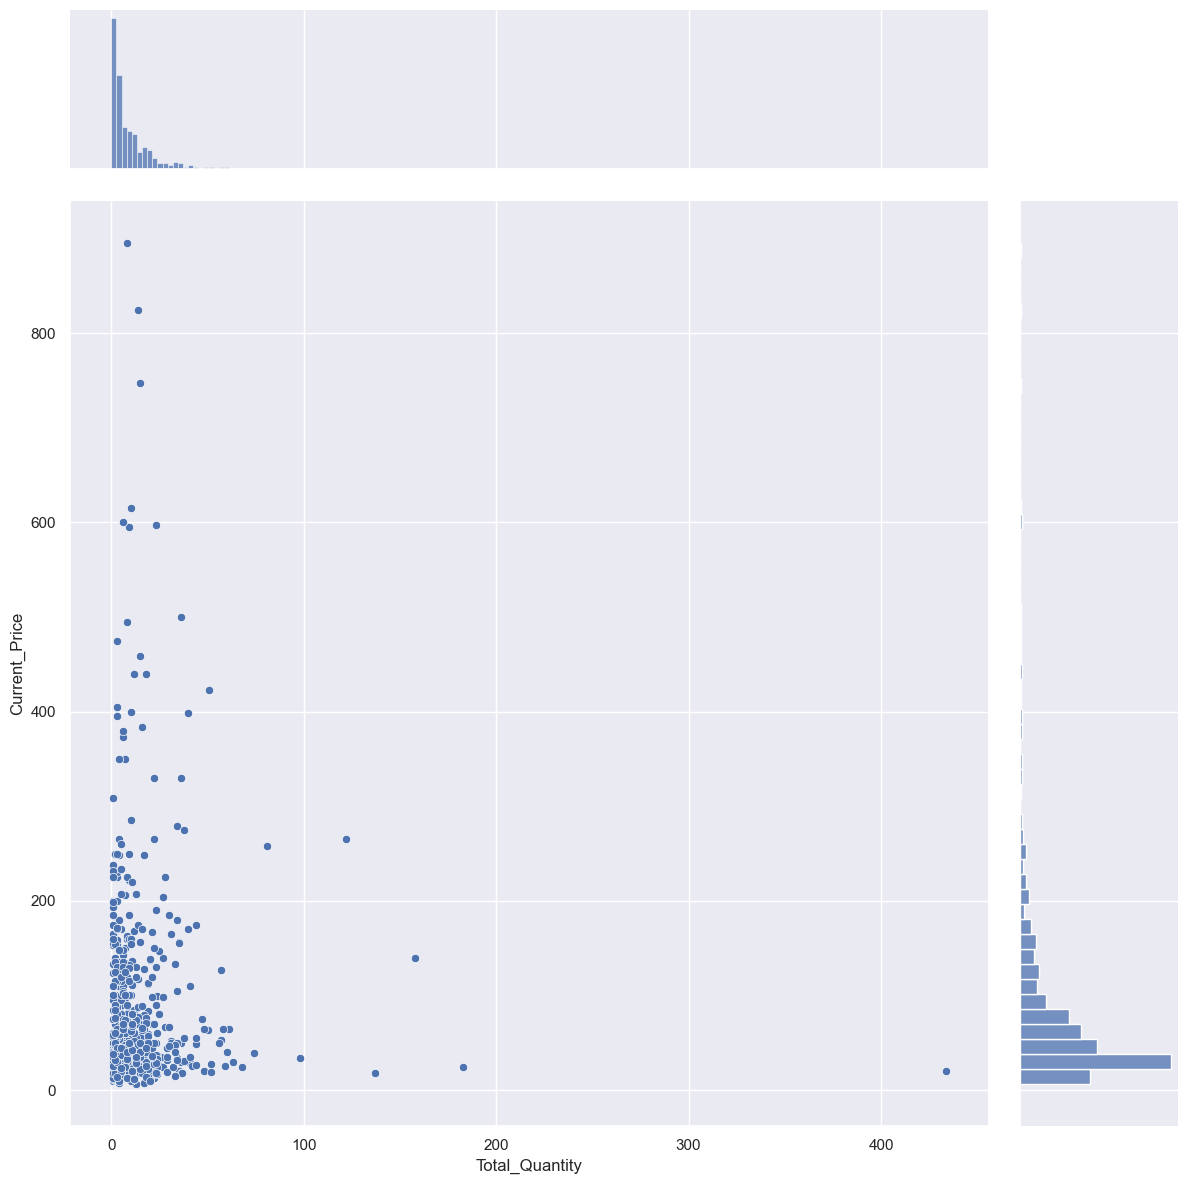

In [46]:
for var in numericalData:
    jointplot(var)

Functions for counting outliers and calculating correlation with Current_Price

In [92]:
def countOutlier(var):
    df = legoData[var]
    Q1 = df.quantile(.25)
    Q3 = df.quantile(.75)
    IQR = Q3-Q1
    count = 0
    for i in df:
        if i > (Q3+1.5*IQR) or i < (Q1-1.5*IQR):
            count+=1
    print(var, "has", count, "outliers\n\n")

def calcCorrelation(var):
    df = legoData[var]
    print("Correlation between", var, "and Current_Price: ", df.corr(legoData["Current_Price"]), "\n")

Correlation between numerical data and Current_Price + number of outliers in each numerical data

In [93]:
for var in numericalData:
    calcCorrelation(var)
    countOutlier(var)

Correlation between num_parts and Current_Price:  0.8410314334940566 

num_parts has 50 outliers


Correlation between num_figs and Current_Price:  0.4107646079557974 

num_figs has 14 outliers


Correlation between retail_price and Current_Price:  0.8573650248189725 

retail_price has 54 outliers


Correlation between num_unique_figs and Current_Price:  0.35932825395156603 

num_unique_figs has 31 outliers


Correlation between retire_price and Current_Price:  0.8329913226100689 

retire_price has 59 outliers


Correlation between pop_price and Current_Price:  0.8970571071998323 

pop_price has 58 outliers


Correlation between Num_Instructions and Current_Price:  0.2682166935094634 

Num_Instructions has 64 outliers


Correlation between Owned and Current_Price:  0.167342266584898 

Owned has 46 outliers


Correlation between USD_MSRP and Current_Price:  0.8564526853880018 

USD_MSRP has 53 outliers


Correlation between Total_Quantity and Current_Price:  0.010871482434053559 

Total